In [1]:
from numpy import fft
import numpy
import math
from matplotlib import pyplot
round5 = lambda v: round(v, 5)
round5array = lambda a: numpy.array(list(map(round5, a)))

In [2]:
def f(t): return math.sin(2*math.pi*t) - 0.5 * math.sin(2*math.pi*t*0.5 - math.pi / 4.0)
np_f = numpy.vectorize(f)
T = 4.0 # seconds
N = 64  # samples
data = np_f(numpy.linspace(0.0, T, N + 1)) # from 0" to 4", in 16th of second (plus a closing tick)

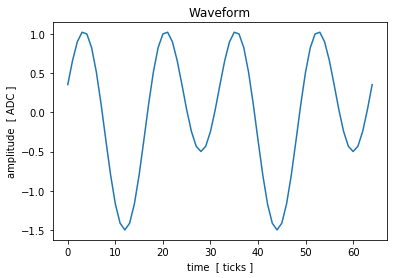

In [3]:
pyplot.plot(data)
pyplot.title("Waveform")
pyplot.xlabel('time  [ ticks ]')
pyplot.ylabel('amplitude  [ ADC ]')
pyplot.show()

In [4]:
data_ft = numpy.fft.rfft(data[:-1]) # real Fourier transform of the data

In [5]:
round5array(data_ft)

/Users/yuntse/Source/products/larsoft/python/v2_7_14b/Darwin64bit+16/lib/python2.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


array([ 0.     , -0.     , 11.31371,  0.     , -0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     , -0.     ,  0.     ,  0.     ,  0.     , -0.     ,
        0.     ,  0.     ,  0.     , -0.     , -0.     ,  0.     ,
       -0.     , -0.     , -0.     ,  0.     ,  0.     , -0.     ,
       -0.     , -0.     , -0.     ])

In [6]:
coeff = abs(data_ft) / (N / 2); round5array(coeff) # amplitudes of the various frequencies

array([0. , 0. , 0.5, 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [7]:
freq = numpy.fft.rfftfreq(len(data[:-1])) * (N / T); freq # frequencies in the Fourier transform vector

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ])

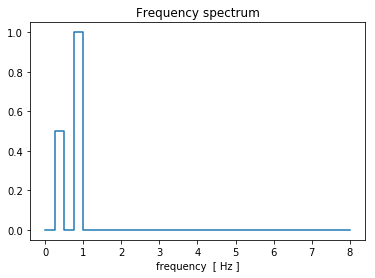

In [8]:
pyplot.plot(freq, coeff, drawstyle="steps")
pyplot.title("Frequency spectrum")
pyplot.xlabel("frequency  [ Hz ]")
pyplot.show()

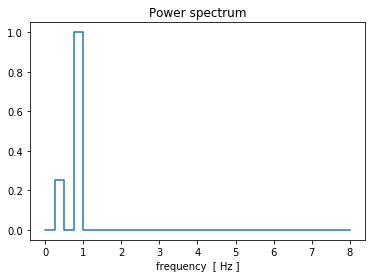

In [9]:
pyplot.plot(freq, coeff**2, drawstyle="steps")
pyplot.title("Power spectrum")
pyplot.xlabel("frequency  [ Hz ]")
pyplot.show()